In [1]:
% matplotlib inline

In [2]:
!ls

CollectInfo.ipynb	     HiLo.ipynb		    Untitled.ipynb
EffectivenessOverTime.ipynb  QualitativeArgo.ipynb
Example Words.ipynb	     QualitativeMu2.ipynb


In [3]:
from __future__ import print_function
import datetime
import random
import matplotlib.pyplot as plt
from src import *

import os
os.chdir("..")

In [11]:
projects = main.load_projects()

snapshot_frms = dict()
changeset_frms = dict()
historical_frms = dict()

for project in projects:
    goldsets = main.load_goldsets(project)
    try:
        snapshot_ranks = main.read_ranks(project, "release")
    except IOError:
        snapshot_ranks = list()
        
    try:
        changeset_ranks = main.read_ranks(project, "changeset")
    except IOError:
        changeset_ranks = list()
        
    try:
        historical_ranks = main.read_ranks(project, "temporal")
    except IOError:
        historical_ranks = list()


    snapshot_frms[project] = dict( (y,(x,z)) for x,y,z in main.get_frms(goldsets, snapshot_ranks))
    changeset_frms[project] = dict( (y,(x,z)) for x,y,z in  main.get_frms(goldsets, changeset_ranks))
    historical_frms[project] = dict( (y,(x,z)) for x,y,z in  main.get_frms(goldsets, historical_ranks))

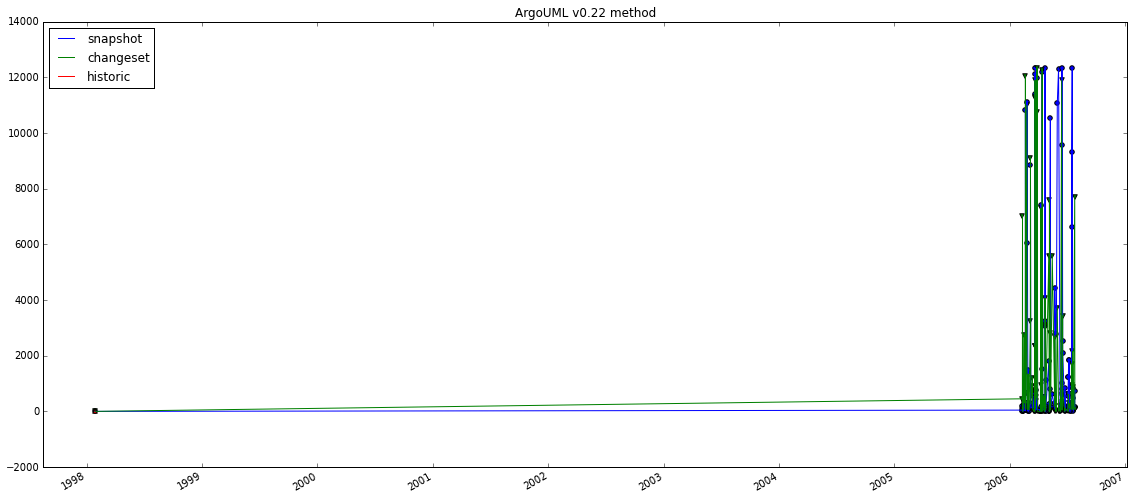

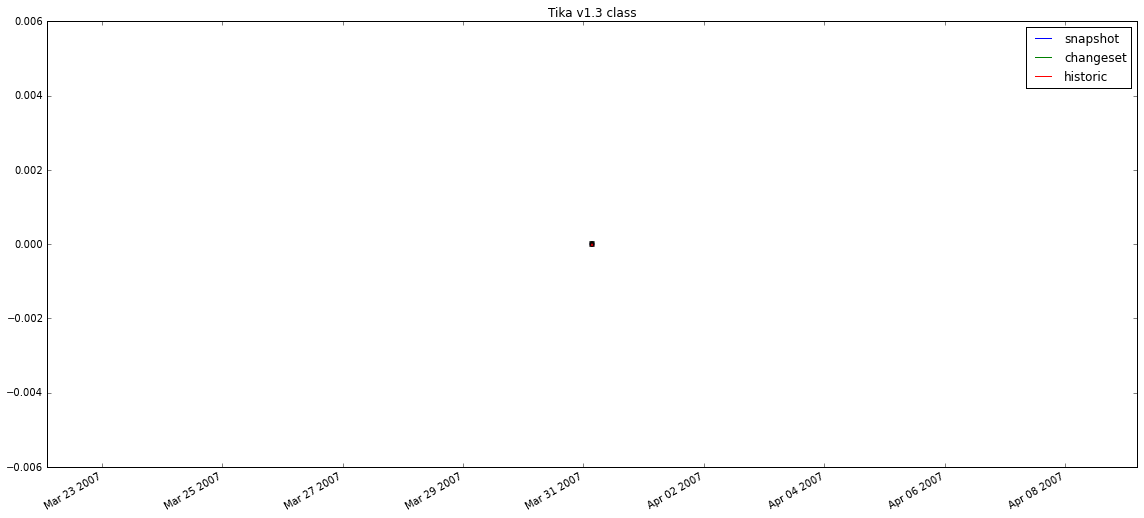

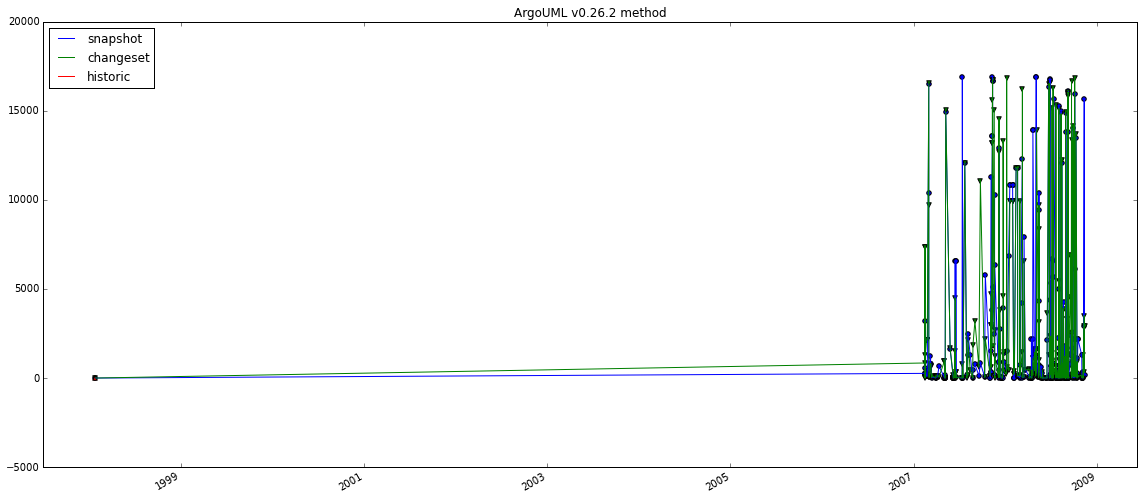

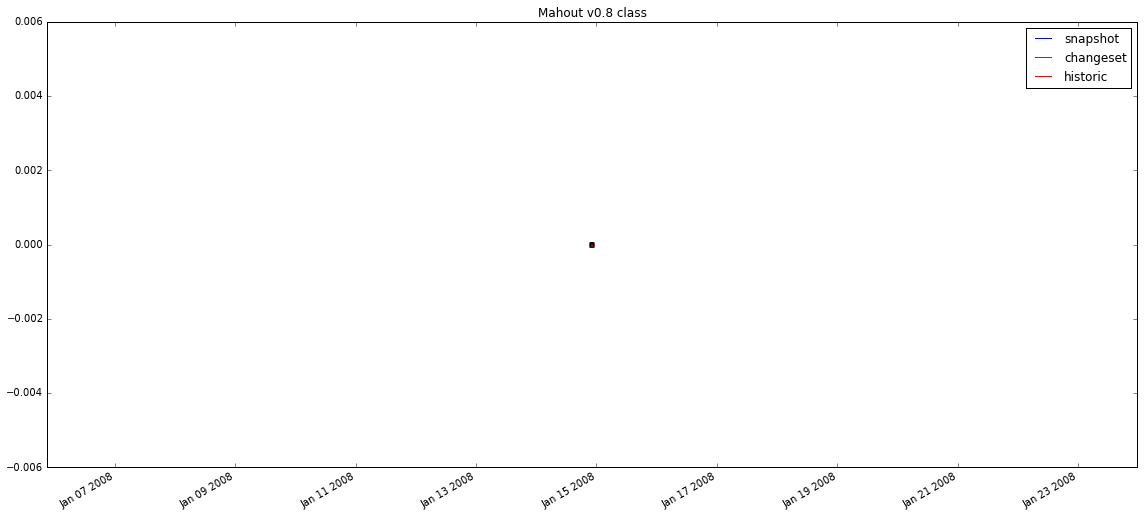

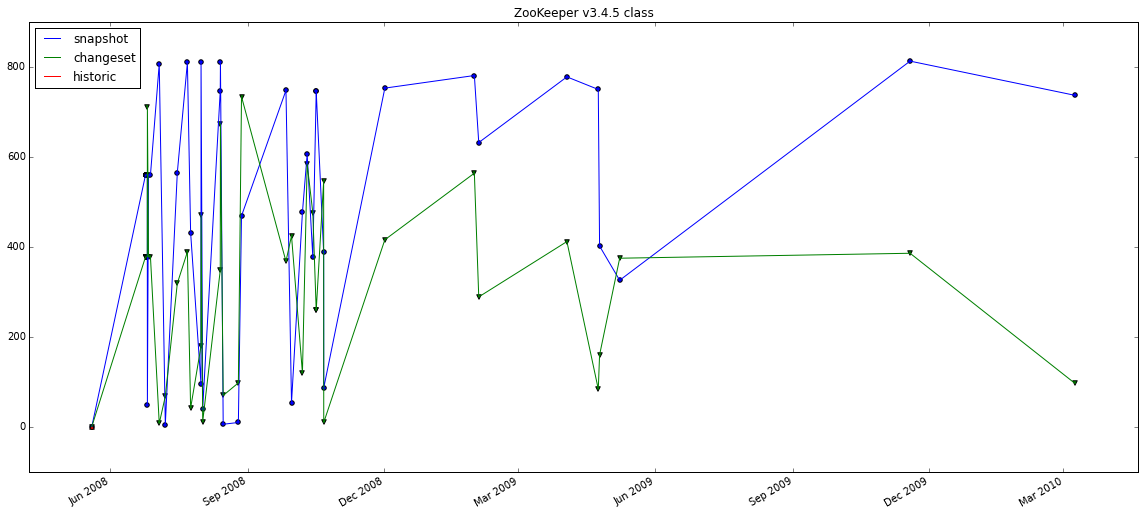

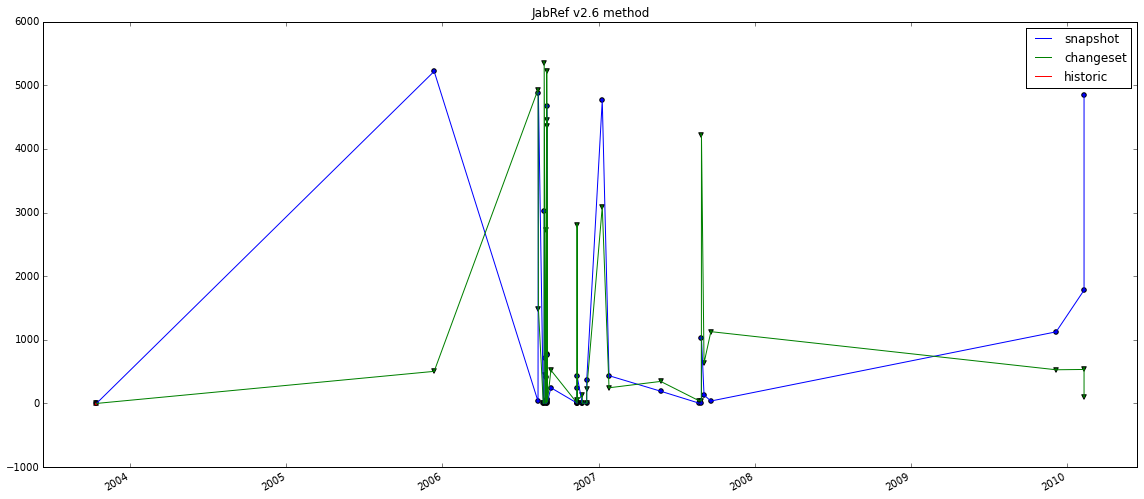

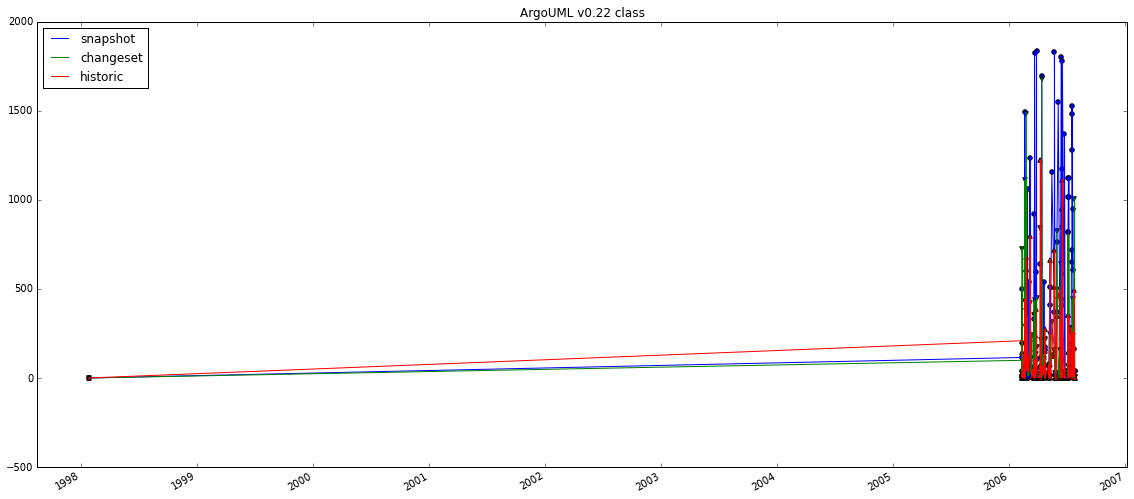

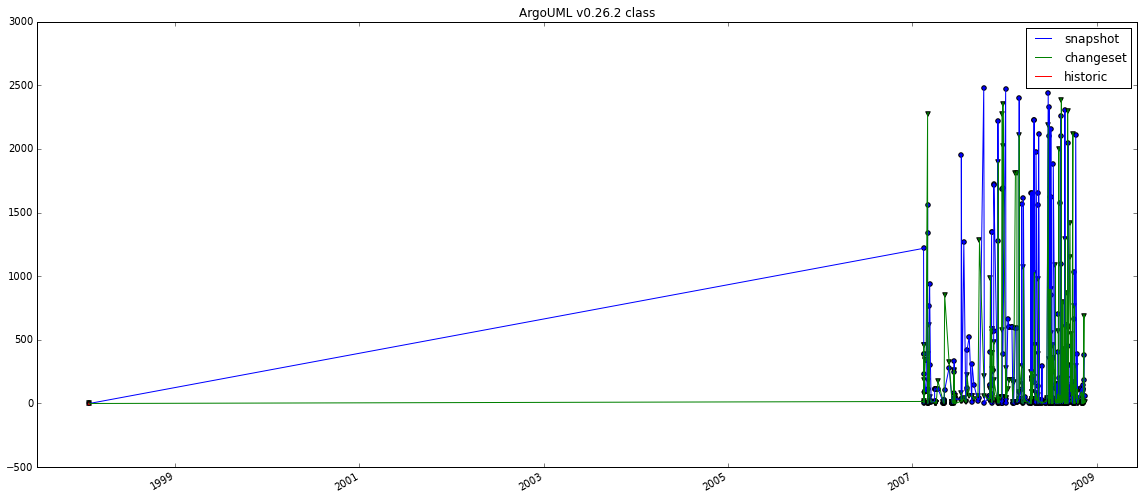

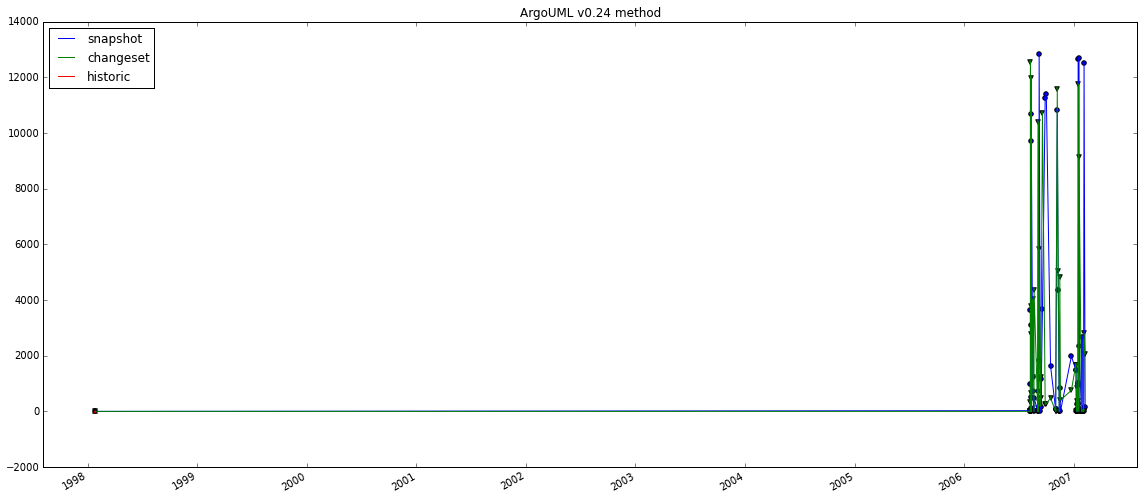

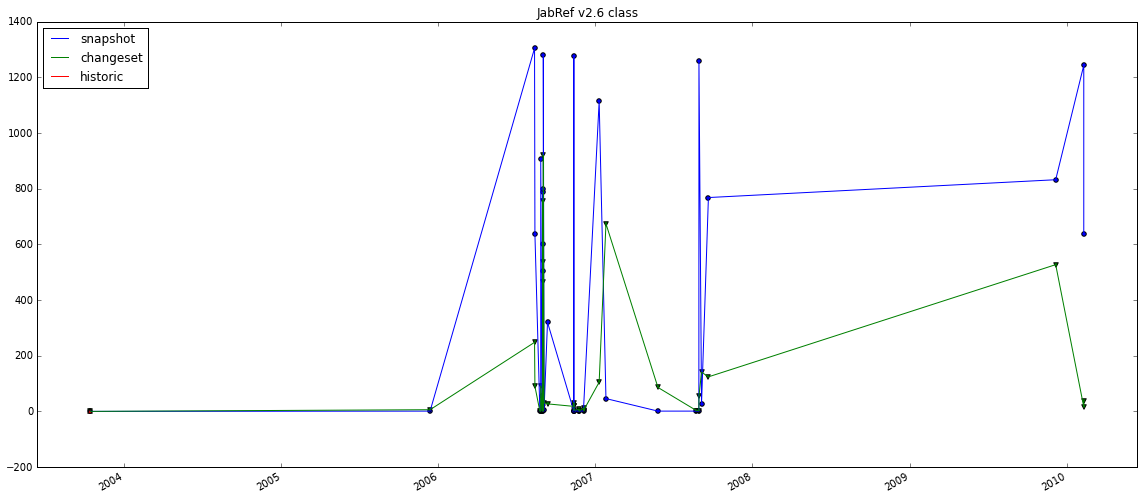

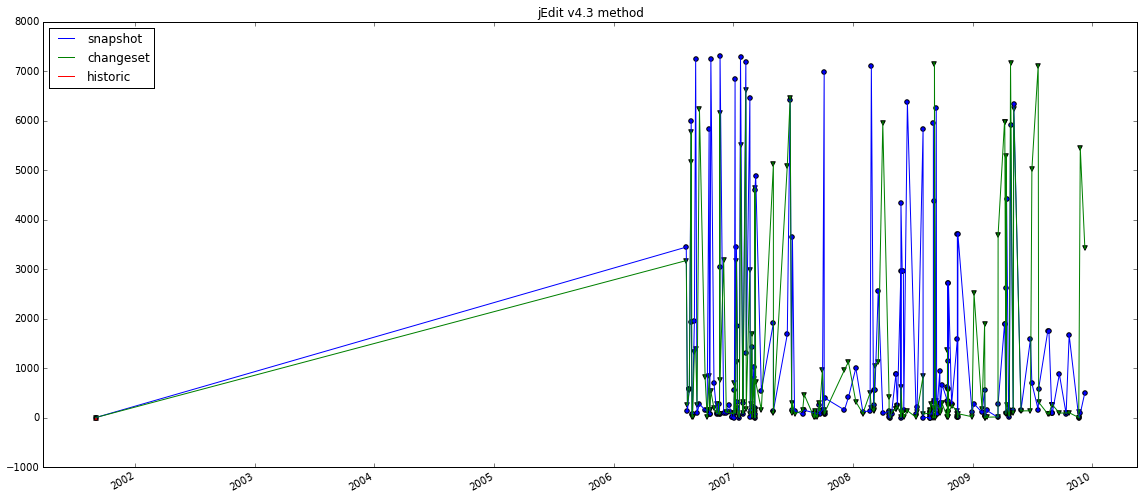

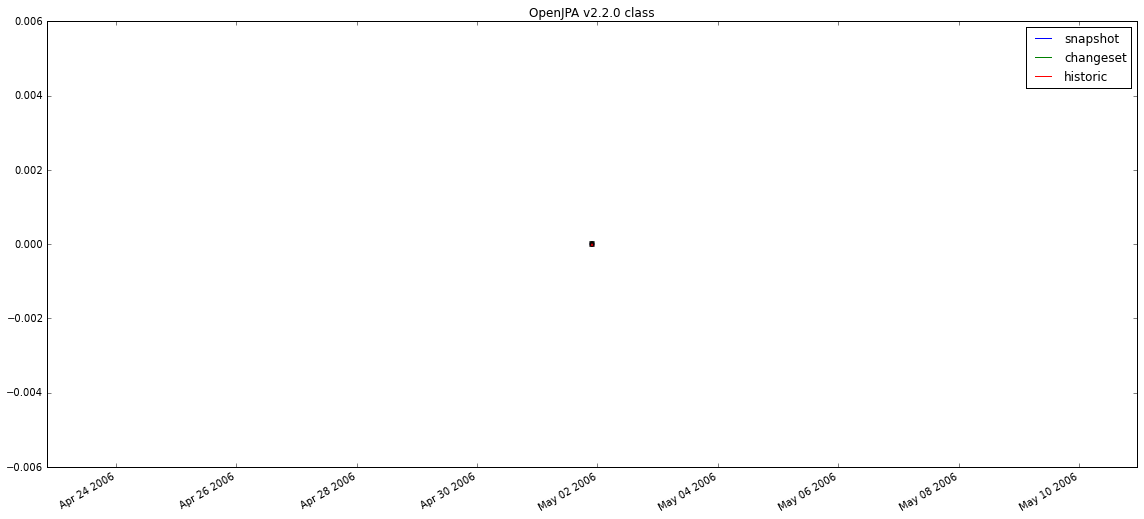

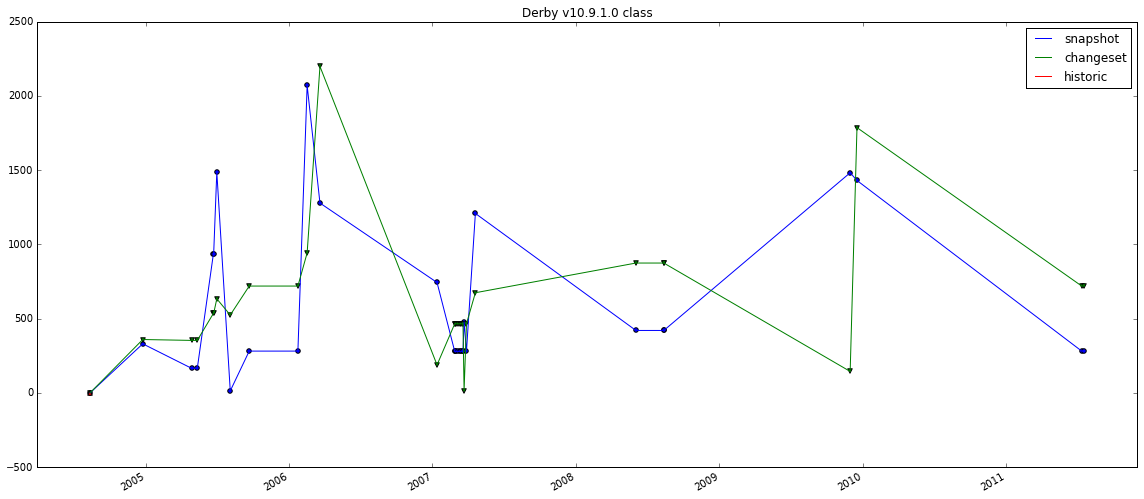

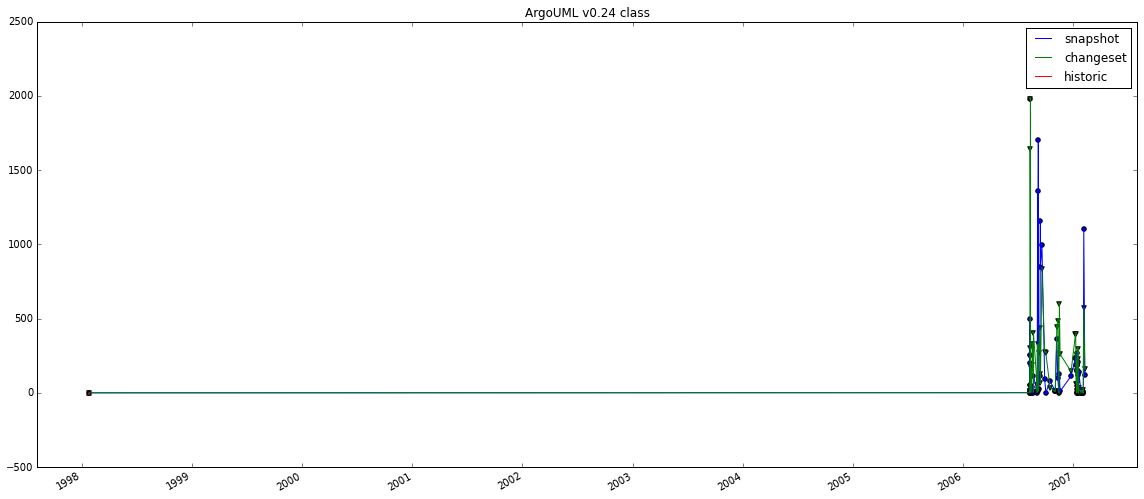

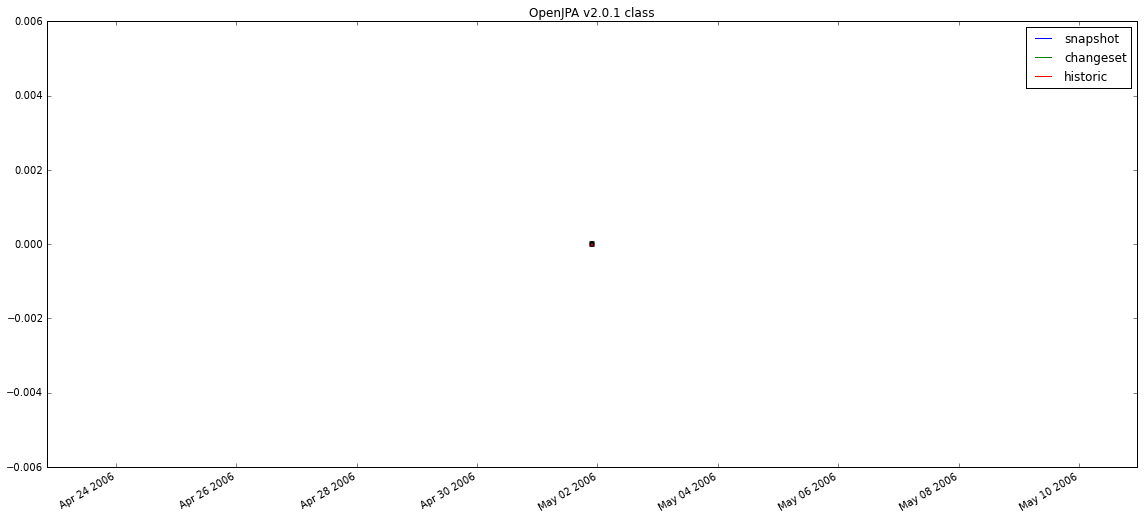

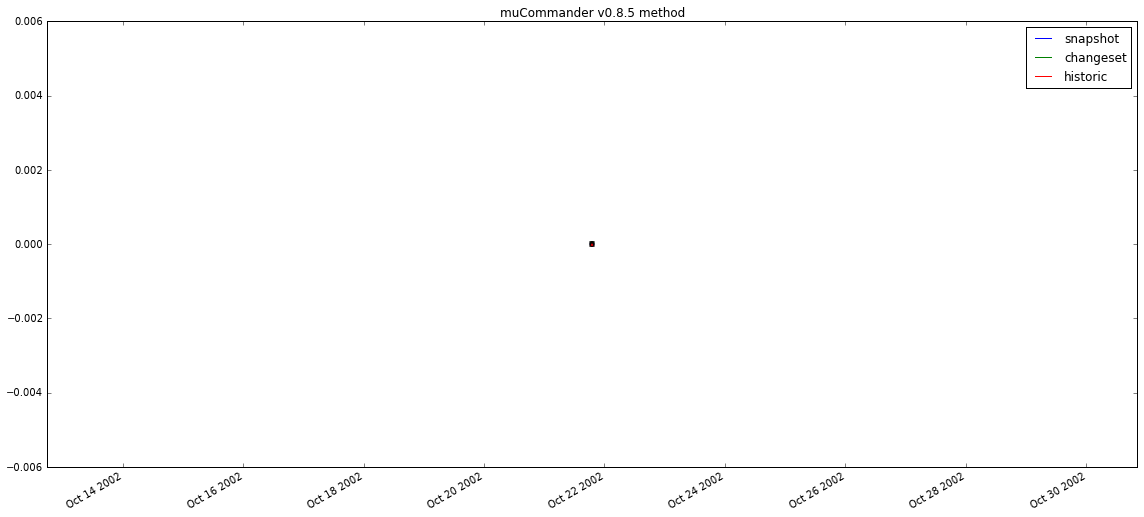

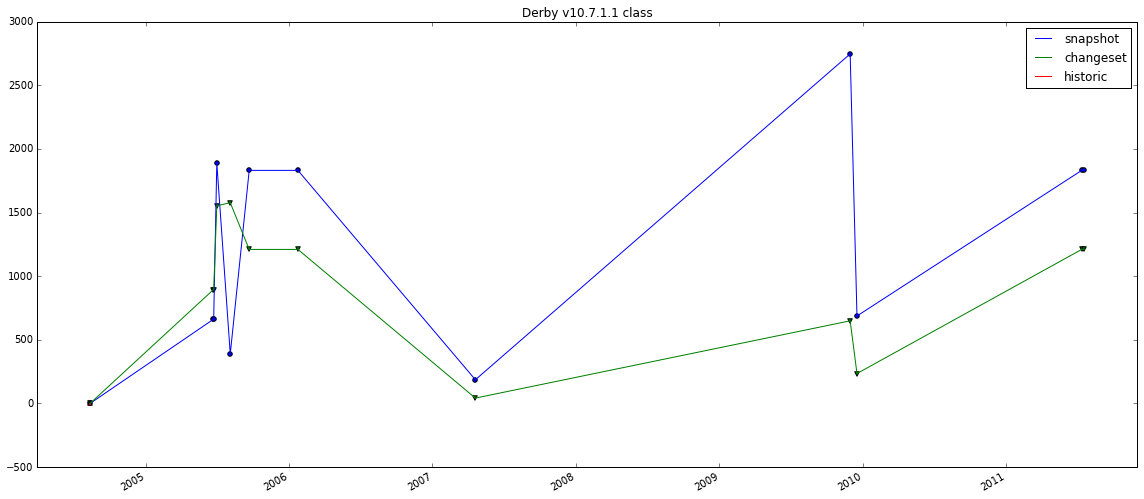

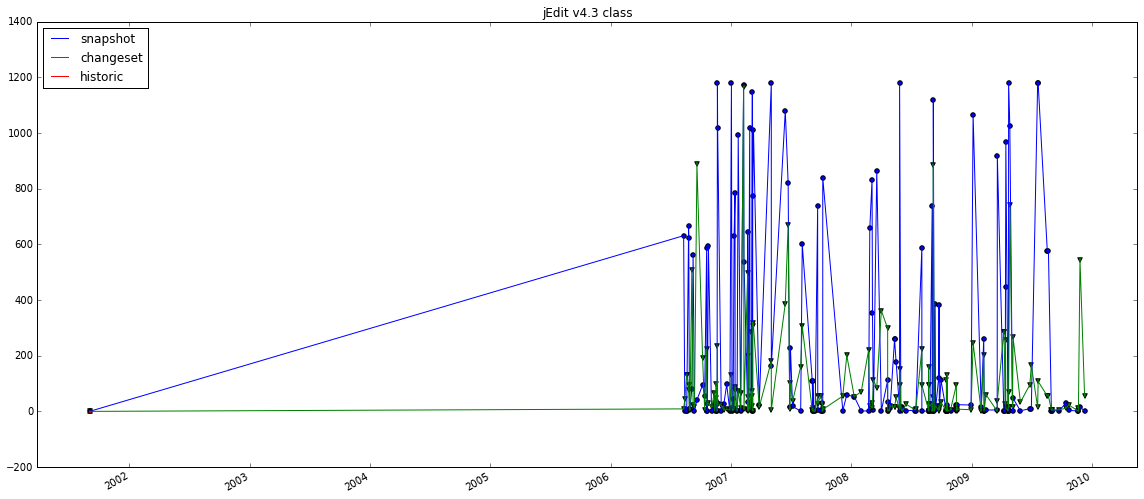

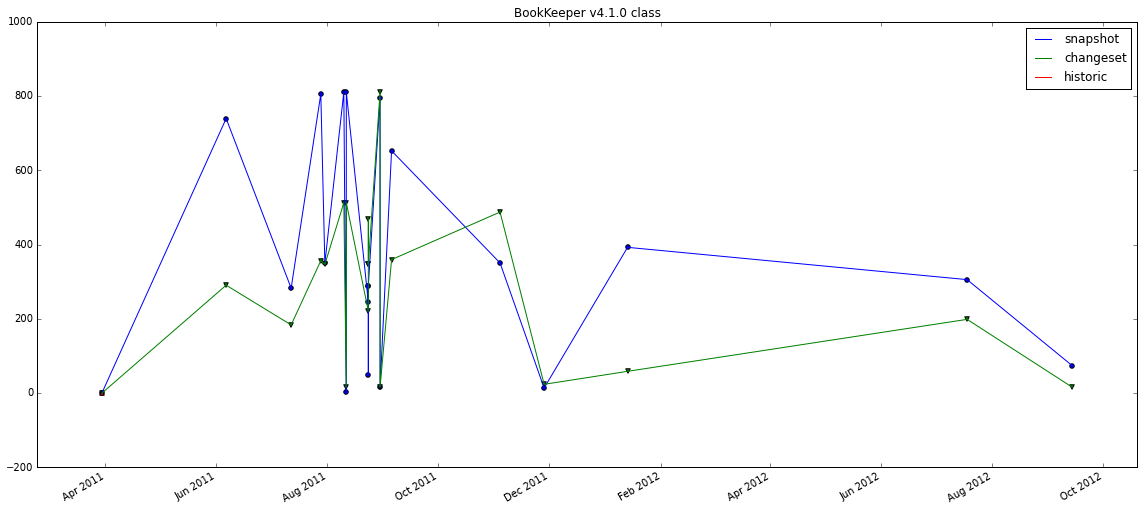

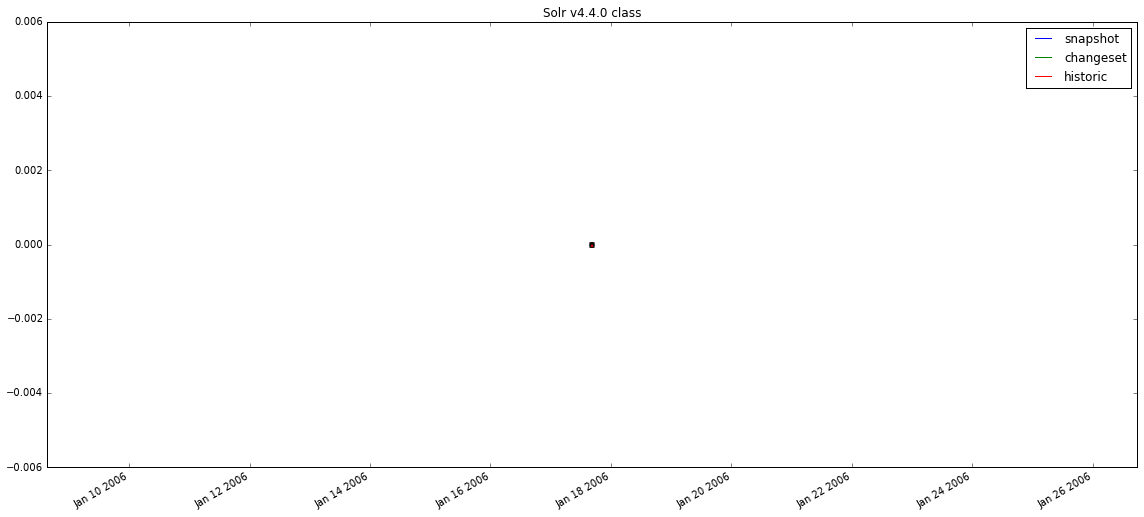

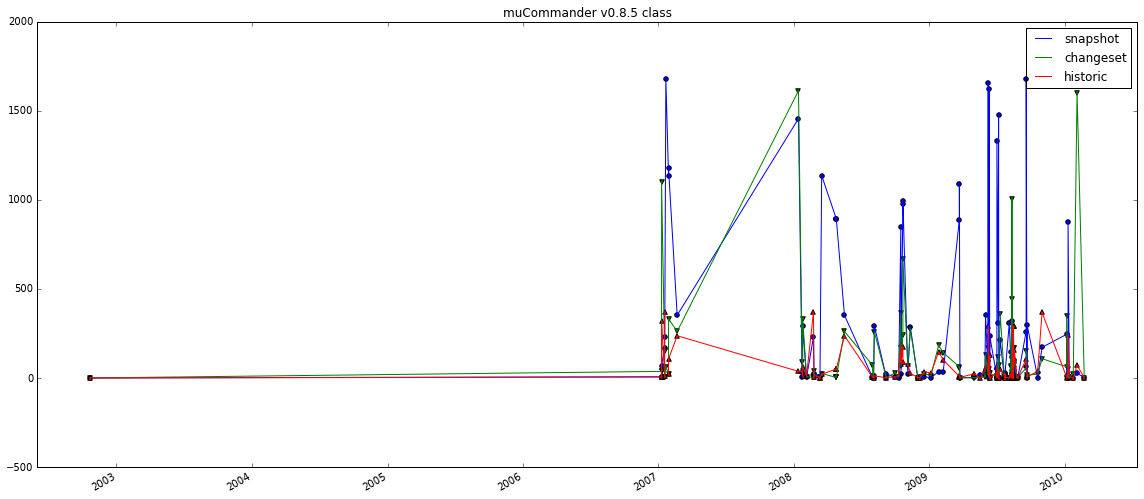

In [12]:
for project in snapshot_frms:
    try:
        i2g, g2i = main.load_issue2git(project, set(map(str, snapshot_frms[project].keys())))
    except:
        continue
    
    repos = main.load_repos(project)
    g2dt = dict()
    for commit in g2i:
        for repo in repos:
            if commit in repo:
                c = repo[commit]
                dt = datetime.datetime.fromtimestamp(c.commit_time)
                g2dt[commit] = dt
                
    # get oldest commit
    commit = next(iter(repos[0].get_walker(reverse=True)))
    
    x = [datetime.datetime.fromtimestamp(commit.commit.commit_time)]
    snapy = [0]
    changey = [0]
    histy = [0]
    """
    x = []
    snapy = []
    changey = []
    histy = []
    """    
    for commit, dt in sorted(g2dt.items(), key=lambda x: x[1]):
        for issue in g2i[commit]:
            x.append(dt)
            i = int(issue)
            if i in snapshot_frms[project]:
                snapy.append(snapshot_frms[project][int(issue)][0])
            else:
                snapy.append(None)

            if i in changeset_frms[project]:
                changey.append(changeset_frms[project][int(issue)][0])
            else:
                changey.append(None)

            if i in historical_frms[project]:
                histy.append(historical_frms[project][int(issue)][0])
            else:
                histy.append(None)

    # plot
    fig = plt.figure(figsize=(16,8))
    plt.scatter(x, snapy, s=20, c='b', marker='o')
    plt.plot(x, snapy, c='b', label="snapshot")
    plt.scatter(x,changey, s=20, c='g', marker='v')
    plt.plot(x, changey, c='g', label="changeset")
    plt.scatter(x,histy, s=20, c='r', marker='^')
    plt.plot(x, histy, c='r', label="historic")
    fig.tight_layout()
    fig.autofmt_xdate()
    plt.title(' '.join([project.printable_name, project.version, project.level]))
    plt.legend(loc='best')
    plt.show()